# H2O.ai AutoML Sample - House Price

In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,5 days 8 hours 31 mins
H2O cluster timezone:,Asia/Tokyo
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,4 months and 10 days !!!
H2O cluster name:,H2O_from_python_ykatada_juw1zw
H2O cluster total nodes:,1
H2O cluster free memory:,1.364 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


## データの読み込み

In [3]:
train = h2o.import_file("train.csv")
test = h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## 目的変数と特徴量を定義する

In [4]:
train.head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,nan,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,

In [5]:
exclude_cols = ["Id", "SalePrice"]
x = [colnames for colnames in train.col_names if colnames not in exclude_cols]

In [6]:
y = "SalePrice"

## AutoML 始動！(10~20分くらいはかかる）

In [7]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


## Leader Boardを確認

In [8]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_1_AutoML_20190715_012801,7.53423e+08,27448.5,7.53423e+08,16056.3,0.13373
GBM_2_AutoML_20190715_012801,7.64293e+08,27645.8,7.64293e+08,16052.1,0.132311
XGBoost_grid_1_AutoML_20190715_012801_model_3,7.75758e+08,27852.4,7.75758e+08,15810.2,0.129437
GBM_3_AutoML_20190715_012801,7.85058e+08,28018.9,7.85058e+08,16336.6,0.134115
GBM_4_AutoML_20190715_012801,7.91029e+08,28125.2,7.91029e+08,16321.2,0.135121
XGBoost_3_AutoML_20190715_012801,7.93535e+08,28169.8,7.93535e+08,15862.1,0.13142
XGBoost_grid_1_AutoML_20190715_012801_model_2,8.46884e+08,29101.3,8.46884e+08,16412.9,0.139372
XGBoost_2_AutoML_20190715_012801,8.65157e+08,29413.5,8.65157e+08,16123.2,0.13322
XGBoost_1_AutoML_20190715_012801,8.72546e+08,29538.9,8.72546e+08,15905.5,0.133657
GBM_grid_1_AutoML_20190715_012801_model_1,8.77276e+08,29618.8,8.77276e+08,17012.6,0.141728


## ベストモデルを確認

In [9]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20190715_012801


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 41052402.57322255
RMSE: 6407.214884270898
MAE: 4995.857408497432
RMSLE: 0.04311340318589904
Mean Residual Deviance: 41052402.57322255

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 753422615.5850879
RMSE: 27448.544871906925
MAE: 16056.270211228577
RMSLE: 0.1337297854297038
Mean Residual Deviance: 753422615.5850879
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,16056.2705000,1480.9053,14757.253,14945.403,15797.7705000,20163.762,14617.163
mean_residual_deviance,753422590.0000000,301819520.0000000,443320224.0000000,595100480.0000000,630930750.0000000,1596660740.0000000,501100992.0000000
mse,753422590.0000000,301819520.0000000,443320224.0000000,595100480.0000000,630930750.0000000,1596660740.0000000,501100992.0000000
r2,0.8862734,0.0314525,0.9175487,0.9060816,0.896292,0.7984728,0.9129717
residual_deviance,753422590.0000000,301819520.0000000,443320224.0000000,595100480.0000000,630930750.0000000,1596660740.0000000,501100992.0000000
rmse,26582.342,4837.444,21055.172,24394.682,25118.334,39958.24,22385.285
rmsle,0.1324243,0.0131807,0.1370488,0.1148687,0.1317978,0.1648491,0.1135571


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-07-15 01:28:49,4.063 sec,0.0,79415.2918861,57434.7702758,6306788585.3492975
,2019-07-15 01:28:50,4.111 sec,5.0,50801.4473051,36592.0912136,2580787048.2924409
,2019-07-15 01:28:50,4.157 sec,10.0,33521.6502579,24096.9044253,1123701036.0146003
,2019-07-15 01:28:50,4.205 sec,15.0,23155.6130229,16781.2196062,536182414.4644392
,2019-07-15 01:28:50,4.251 sec,20.0,16995.8658672,12543.8186002,288859456.5748259
,2019-07-15 01:28:50,4.299 sec,25.0,13238.2017329,9962.1255886,175249985.1219675
,2019-07-15 01:28:50,4.347 sec,30.0,11030.2277795,8410.2585376,121665924.8676250
,2019-07-15 01:28:50,4.402 sec,35.0,9597.3376108,7404.6484857,92108889.2162467
,2019-07-15 01:28:50,4.458 sec,40.0,8545.0247454,6642.6944001,73017447.8993831
,2019-07-15 01:28:50,4.510 sec,45.0,7790.7418940,6071.2736194,60695659.2592682


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual,13735081017344.0000000,1.0,0.3104439
ExterQual,5325213138944.0000000,0.3877089,0.1203618
GarageCars,4429998194688.0000000,0.3225316,0.1001280
GrLivArea,4055887249408.0000000,0.2952940,0.0916722
Neighborhood,3963175305216.0000000,0.2885440,0.0895767
---,---,---,---
Heating,424165088.0000000,0.0000309,0.0000096
MiscVal,284881792.0000000,0.0000207,0.0000064
MiscFeature,273137984.0000000,0.0000199,0.0000062
Street,0.0,0.0,0.0



See the whole table with table.as_data_frame()


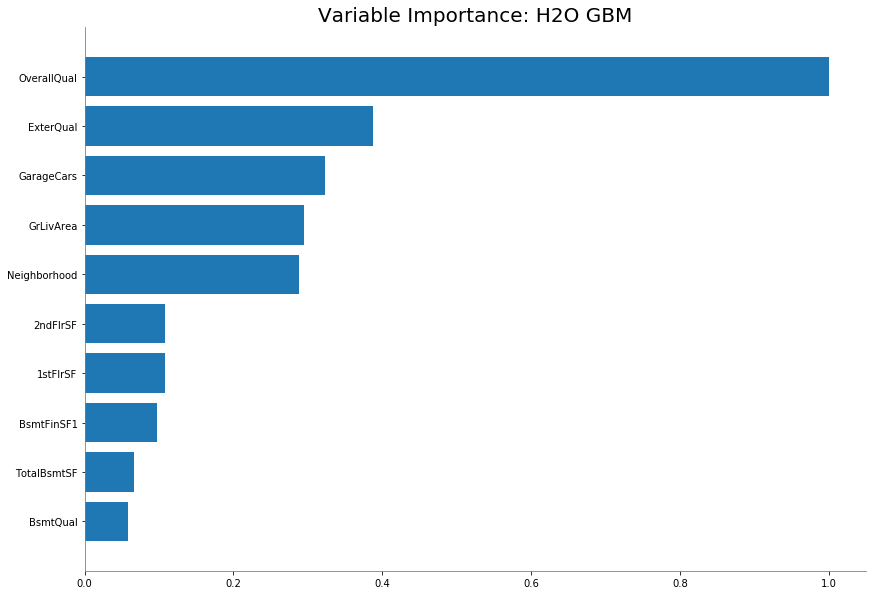

In [10]:
%matplotlib inline
aml.leader.varimp_plot()

## 予測する

In [11]:
preds = aml.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


/Users/ykatada/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'MSZoning' has levels not trained on: [NA]
  warnings.warn(w)
/Users/ykatada/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Utilities' has levels not trained on: [NA]
  warnings.warn(w)
/Users/ykatada/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Exterior1st' has levels not trained on: [NA]
  warnings.warn(w)
/Users/ykatada/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Exterior2nd' has levels not trained on: [NA]
  warnings.warn(w)
/Users/ykatada/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'KitchenQual' has levels not trained on: [NA]
  warnings.warn(w)
/Users/ykatada/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Functio

In [12]:
preds

predict
125540
152217
186232
187708
187411
181035
163197
173417
182572
126506


In [13]:
test["SalePrice"] = preds

In [14]:
h2o.export_file(test[["Id", "SalePrice"]], path="submission.csv")

Export File progress: |███████████████████████████████████████████████████| 100%


## submission

<img src="H2O_kaggle_submission.png"></img>